# 01NAEX Project 01 - Pendulum study

Add your team name(s), members, and roles here (optional).

## Research Task

Design and run an experiment to investigate which factors affect the period of a simple pendulum. For small release angles, classical theory predicts the period T depends only on the string length L:

$T \approx 2*\pi*\sqrt{\frac{L}{g}} \ \ \text{for} \ \ |\theta| <= 10\text{deg}$

https://en.wikipedia.org/wiki/Pendulum_(mechanics)

That is, for small angles the period should be independent of the bob's weight (mass) and approximately independent of angle. Your goal is to build an experiment that confirms that weight is not a significant factor, while verifying the expected length effect. You may optionally probe how well the "small-angle" approximation holds by using a couple of small angle levels.

- Response variable: period T (seconds). Recommended protocol: time $N$ swings with a stopwatch and use $T = t_N / N$ to reduce reaction-time error.
- Primary factors:
  - Length $L$ (quantitative, choose >= 3 levels across your feasible range)
  - Weight $m$ (mass of the bob; choose 2-3 levels). Theory: no effect on $T$.
  - Release angle $\theta$ (small angles: e.g., 5, 10, 20 degrees; choose >= 2 levels to test the approximation)
- Optional nuisance/structure: operator (person), day/session, string type, pivot, ambient conditions. You may treat these as blocks or ignore them if you control them sufficiently.

You decide whether to randomize run order, include operators, blocking, or repeated measurements - justify your choices using **design of experiments reasoning**.

## Design Guidance

- Target the physics regime where the small-angle approximation is valid $(|\theta| \leq 10 deg)$. If you exceed this, discuss the implications.
- Plan replicates/repeated measurements to mitigate stopwatch error (e.g., 3 repeats per treatment or average of 10-20 swings per timing).
- If multiple operators participate, consider blocking by operator or using a mixed-effects model.
- Randomize run order if practical; if not, explain how you controlled time-related drift.
- Record all factor levels and the run order for traceability.
- Power: Aim for $\beta \leq 0.1$  to detect a 0.1s change in T between mass levels at $\alpha = 0.05$. Use a pilot SD (e.g., from 10 swings) to size the study.

## Submission

Submit by the deadline in PDF, Rmd, or ipynb (Python or R). Include raw data (I prefer a link to the data in the code) and your analysis code with outputs. Ensure the report is self-contained and reproducible.

## Tasks / Questions

1) Planning and design
- Define your factors and levels ($L$, $m$, $\theta$) and any nuisance variables (operators, sessions, etc.).
- Specify the response and the measurement protocol ($N$ swings per timing, repeats per treatment, instrumentation, units).
- State whether you will randomize or block; justify your choices.

2) Power and sample size (pre-study)
- Using a pilot SD (or a reasonable assumption), estimate how many replicates per treatment you need to achieve 80% power to detect a 2-3% change in $T$ between mass levels at $\alpha = 0.05$. State assumptions clearly.

3) Data collection and quality
- Report the full data table (with run order if randomized) and basic summaries (mean, SD) by factor level.
- Visualize the data (e.g., boxplots and mean+/-SE) across $L$, $m$, and $\theta$.

4) Primary analysis - ANOVA
- Fit an ANOVA model for $T$ with factors $L$, $m$, $\theta$. Consider interactions only if justified by design.
- Test and interpret the effect of weight $m$. Report F, df, and p-values.

5) ANOVA - multiple comparison (Tukey, LSD)
- Find out if there is significant difference in means between different levels of $L$, $m$, $\theta$.
- Can we confirm the assumption that the mass of the blob does not matter?
- Can we confirm the assumption that a small angle has no effect on the time T , but a larger one does?

6) Assumptions and diagnostics
- Provide residual plots (QQ-plot, residuals vs fitted, ...) and formal tests where relevant. Discuss any deviations and remedies.
- Discuss the effect of the experimental design and the evolution of the residuals over time (order of measurements).

7) Post-study power/reflection
- Based on the observed SD and estimates, re-calc the achieved power of the test in the ANOVA for different lenghts of ropes and corresponding measuremnts and other factors.
- Assume the difference in T we want to detect is 0.1s. Calculate the number of repetition needed for the power of the resulting test to be greater than 0.9.

8) Alternative model - regression with quantitative factors
- Fit a regression with T ~ sqrt(L) (or log T vs 0.5 log L) and include theta (as small quantitative) and m. Compare conclusions about m.
- Choose model with significant variables.

9) Conclusions
- Summarize whether the data support the theoretical result (T depends on L; m not significant at small angles). Provide a minimal recommended design that would convincingly demonstrate this in future labs.

10) (Optional) Estimate $g$
- Use your best model to estimate $g$ and provide an interval. Compare to 9.81 $m/s^2$.


### 1) Planning and design

# **Experiment**
-------------------
**Preparation**
* The pendulum mass was weighed using a digital scale.
* The mass was attached to a string.
* The upper end of the string was fixed to the bottom side of a support board, which was positioned above another board used for drawing reference angles.
* The length L was defined as the distance between the point where the string was attached to the support board and the center of mass.
* On the lower board, reference lines were drawn to indicate specific angle (θ).
* The horizontal distance of each line from the vertical position was calculated using $$x=L⋅\tan(θ)$$
for the selected angles.

**Measurement procedure**
* One operator displaced the pendulum mass to the required angle θ and released it.
* Two operators measured the time using a phone stopwatch.
* Timing started when the pendulum mass first passed the vertical reference line.
* The stopwatch was stopped after the fifth complete swing (N=5).
* All factor levels and measurement repetitions were recorded.

**Data processing**
* For each treatment level, two repeated measurements were performed.
* In total, 54 measurements were collected.
* The measurements taken by the two operators were averaged to reduce random error.
* The mean values were used to calculate the period T as $$T = \frac{t_{N}}{N}$$
* Overall, 27 periods are available.

**Blocking and randomization**
* Blocking was not applied because both operators measured simultaneously.
* But the potential variability due to differences in human reaction time was controlled by averaging the measurements from the two operators for each treatment.
* Randomization of the experimental runs was also not applied, because for each mass, all lengths and angles were measured in a fixed sequence.
* This approach ensured that all combinations of factors were measured completely and consistently.

# **Factors**
--------------------
* Length (L) - 3 levels: 33 cm, 65.5 cm, 120 cm
* Weight (m) - 3 levels: 77 g, 139 g, 220 g
* Angle (θ) - 3 levels: 5°, 10° 20°




In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/VojtasekP/NAEX-pendulum/refs/heads/main/NAEX_pendulum.csv"
data = pd.read_csv(url)
print(data)
print("---------------------------------------------------------------------------------")
print(data.describe())

        L    m  angle  time_Sab  time_Flo  time_avg  period
0    65.5   77      5      8.06      8.10     8.080   1.616
1    65.5   77     10      8.24      8.23     8.235   1.647
2    65.5   77     20      8.19      8.23     8.210   1.642
3    33.0   77      5      5.83      5.26     5.545   1.109
4    33.0   77     10      5.88      6.00     5.940   1.188
5    33.0   77     20      5.69      5.34     5.515   1.103
6   120.0   77      5     11.04     11.21    11.125   2.225
7   120.0   77     10     11.04     11.01    11.025   2.205
8   120.0   77     20     11.21     11.01    11.110   2.222
9    65.5  220      5      8.04      8.08     8.060   1.612
10   65.5  220     10      8.11      8.15     8.130   1.626
11   65.5  220     20      8.09      7.96     8.025   1.605
12   33.0  220      5      5.84      6.00     5.920   1.184
13   33.0  220     10      5.83      5.87     5.850   1.170
14   33.0  220     20      5.84      5.81     5.825   1.165
15  120.0  220      5     11.08     11.2

In [ ]:
data['L'] = data['L']/100
T = data['period']
L= data['L']
m = data['m']
θ = data['angle']

### 2) Power and sample size (pre-study)

Cohen’s *f* for ANOVA is defined as:

$
f = \frac{\sqrt{\frac{1}{k}\sum_{i=1}^{k}(\mu_i - \bar{\mu})^2}}{\sigma}
$

where  
- $ \mu_i $ are the group means,  
- $ \bar{\mu} $ is the overall mean,  
- $ k $ is the number of groups, and  
- $ \sigma $ is the within-group standard deviation.

In [ ]:
import numpy as np
from math import ceil
from statsmodels.stats.power import FTestAnovaPower

# Fixed scenario
T_t = 1.1152          # in seconds, baseline period, for which the human reaction
                      # is most influential, i.e. the 33cm
                    # for L=65.5 its 1.622
sigma_T = 0.025     # per-period SD from your timing (already divided by 5 periods)
                   # this was derived from the average human reaction time study
                   # which stated the reaction time SD to 90ms, perperiod std is than.
                   # than sigma_T = sqrt(var(start+stop))/5=(√2×90)/ 5 ≈ 25 ms
alpha = 0.05
k_groups = 3       # three mass levels

# Target relative differences (2% and 3%)
deltas = [0.02*T_t, 0.03*T_t]   # absolute seconds

# Cohen's f for 3 groups with means [-Δ/2, 0, +Δ/2]
f_vals = []
for delta in deltas:
    means = np.array([-delta/2, 0.0, +delta/2])
    var_means = (means**2).mean()
    f_vals.append(np.sqrt(var_means) / sigma_T)

print(f"sigma_T = {sigma_T:.3f} s")
print(f"Δ (2%, 3%) = {deltas[0]:.5f} s, {deltas[1]:.5f} s")
print(f"Cohen f (2%, 3%) = {f_vals[0]:.3f}, {f_vals[1]:.3f}")

# Power vs replicates per mass level
solver = FTestAnovaPower()
for f, label in zip(f_vals, ["2%", "3%"]):
    print(f"\nPower for {label} effect (f={f:.3f}):")
    for n in [3,6,9,12,15,27,54,108]:
        pwr = solver.power(effect_size=f, k_groups=k_groups, nobs=n, alpha=alpha)
        print(f"  observations/group ={n//3:>2} -> power={pwr:.3f}")
    n80 = solver.solve_power(effect_size=f, k_groups=k_groups, power=0.80, alpha=alpha)
    print(f"  observations/group for 80% power ≈ {ceil(n80//3)}")


sigma_T = 0.025 s
Δ (2%, 3%) = 0.02230 s, 0.03346 s
Cohen f (2%, 3%) = 0.364, 0.546

Power for 2% effect (f=0.364):
  observations/group = 1 -> power=nan
  observations/group = 2 -> power=0.076
  observations/group = 3 -> power=0.110
  observations/group = 4 -> power=0.146
  observations/group = 5 -> power=0.184
  observations/group = 9 -> power=0.337
  observations/group =18 -> power=0.639
  observations/group =36 -> power=0.927
  observations/group for 80% power ≈ 25

Power for 3% effect (f=0.546):
  observations/group = 1 -> power=nan
  observations/group = 2 -> power=0.110
  observations/group = 3 -> power=0.193
  observations/group = 4 -> power=0.281
  observations/group = 5 -> power=0.368
  observations/group = 9 -> power=0.662
  observations/group =18 -> power=0.947
  observations/group =36 -> power=0.999
  observations/group for 80% power ≈ 11


**We measured 27 measurements, which means 9 per weight group. Our power of anova would be around 0.337 for 2% difference and 0.662 for 3%**


### 3) Data collection and quality

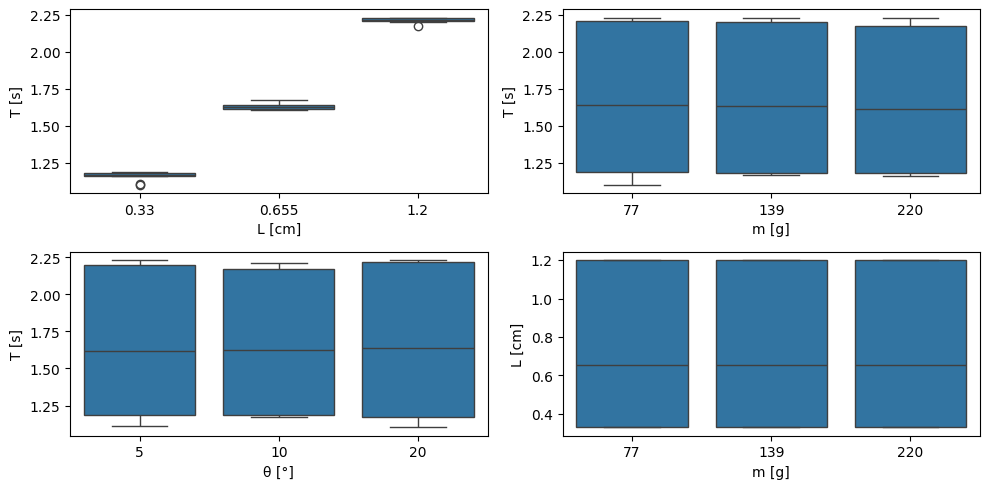

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
sns.boxplot(x=L, y=T, ax=axes[0, 0])
axes[0,0].set_xlabel("L [cm]")
axes[0,0].set_ylabel("T [s]")

sns.boxplot(x=m, y=T, ax=axes[0,1])
axes[0,1].set_xlabel("m [g]")
axes[0,1].set_ylabel("T [s]")

sns.boxplot(x=θ, y=T, ax=axes[1, 0])
axes[1,0].set_xlabel("θ [°]")
axes[1,0].set_ylabel("T [s]")

sns.boxplot(x=m, y=L, ax=axes[1,1])
axes[1,1].set_xlabel("m [g]")
axes[1,1].set_ylabel("L [cm]")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# assuming you already have:
# T = data['period'], L = data['L'], m = data['m'], θ = data['angle']
# all columns are in `data`

# full table with run order if randomized
data = data.reset_index().rename(columns={'index': 'run_order'})
print(data.head())

# summaries by each factor
summary_L = data.groupby('L')['period'].agg(['mean', 'std']).reset_index()
summary_m = data.groupby('m')['period'].agg(['mean', 'std']).reset_index()
summary_theta = data.groupby('angle')['period'].agg(['mean', 'std']).reset_index()

print("\nSummary by L:\n", summary_L)
print("\nSummary by m:\n", summary_m)
print("\nSummary by θ:\n", summary_theta)


    run_order  run_order      L    m angle  time_Sab  time_Flo  time_avg  \
0           0          0  0.655   77     5      8.06      8.10     8.080   
1           1          1  0.655   77    10      8.24      8.23     8.235   
2           2          2  0.655   77    20      8.19      8.23     8.210   
3           3          3  0.330   77     5      5.83      5.26     5.545   
4           4          4  0.330   77    10      5.88      6.00     5.940   
5           5          5  0.330   77    20      5.69      5.34     5.515   
6           6          6  1.200   77     5     11.04     11.21    11.125   
7           7          7  1.200   77    10     11.04     11.01    11.025   
8           8          8  1.200   77    20     11.21     11.01    11.110   
9           9          9  0.655  220     5      8.04      8.08     8.060   
10         10         10  0.655  220    10      8.11      8.15     8.130   
11         11         11  0.655  220    20      8.09      7.96     8.025   
12         1

/tmp/ipython-input-1433368341.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_L = data.groupby('L')['period'].agg(['mean', 'std']).reset_index()
/tmp/ipython-input-1433368341.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_m = data.groupby('m')['period'].agg(['mean', 'std']).reset_index()
/tmp/ipython-input-1433368341.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_theta = data.grou

In [ ]:
array = np.array([0.98, 0.98, 0.98, 0.98, 0.98])

### 4) Primary analysis - ANOVA

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Make sure categorical factors are coded correctly
data['L'] = data['L'].astype('category')
data['m'] = data['m'].astype('category')
data['angle'] = data['angle'].astype('category')


In [ ]:
# additive model (no interactions)
model = smf.ols('period ~ C(L) + C(m) + C(angle)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II for balanced designs
print(anova_table)

            sum_sq    df            F        PR(>F)
C(L)      5.008551   2.0  3914.743168  1.153155e-26
C(m)      0.001414   2.0     1.104910  3.506305e-01
C(angle)  0.000102   2.0     0.079435  9.239280e-01
Residual  0.012794  20.0          NaN           NaN


In [ ]:
F_m = anova_table.loc['C(m)', 'F']
df_m = (anova_table.loc['C(m)', 'df'], anova_table.loc['Residual', 'df'])
p_m = anova_table.loc['C(m)', 'PR(>F)']

print(f"Effect of mass m: F({df_m[0]:.0f}, {df_m[1]:.0f}) = {F_m:.3f}, p = {p_m:.4f}")


Effect of mass m: F(2, 20) = 1.105, p = 0.3506


### 5) Tukey, LSD

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_angle = pairwise_tukeyhsd(data['period'], data['angle'])
print(tukey_angle)
tukey_m = pairwise_tukeyhsd(data['period'], data['m'])
print(tukey_m)
tukey_L = pairwise_tukeyhsd(data['period'], data['L'])
print(tukey_L)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     5     10   0.0016    1.0  -0.537 0.5401  False
     5     20  -0.0031 0.9999 -0.5417 0.5354  False
    10     20  -0.0047 0.9997 -0.5432 0.5339  False
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    77    139   0.0167 0.9967 -0.5218 0.5551  False
    77    220   0.0031 0.9999 -0.5354 0.5416  False
   139    220  -0.0136 0.9978  -0.552 0.5249  False
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
  0.33  0.655    0.472   0.0 0.4433 0.5007   True
  0.33    1.2   1.0531   0.0 1.0244 1.0819   True
 0.655    1.2   0.58

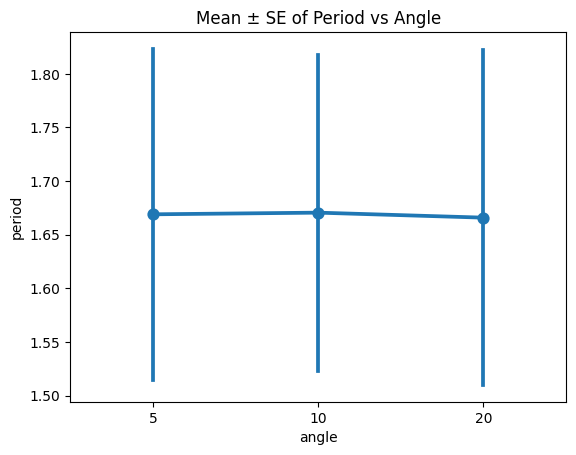

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(x='angle', y='period', data=data, errorbar='se')
plt.title('Mean ± SE of Period vs Angle')
plt.show()


### 6) Assumptions and diagnostics

In [ ]:
resid = model.resid
fitted = model.fittedvalues

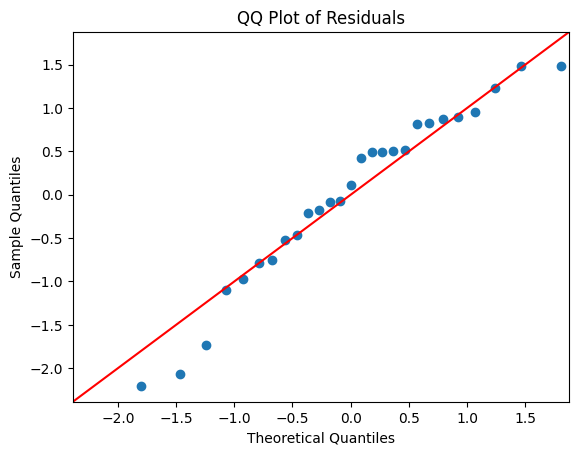

In [ ]:
sm.qqplot(resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()


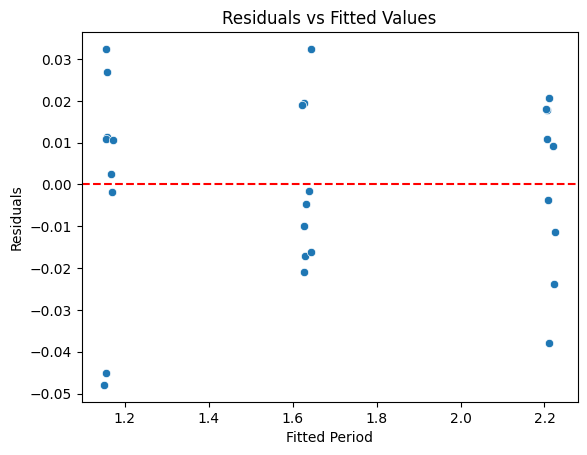

In [ ]:
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Period')
plt.ylabel('Residuals')
plt.show()


### 7) Post-study power/reflection

In [ ]:
model = smf.ols('T ~ C(L)', data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

            sum_sq    df            F        PR(>F)
C(L)      5.008551   2.0  4200.238787  2.857717e-31
Residual  0.014309  24.0          NaN           NaN


### 8) Alternative model - regression with quantitative factors

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# if factors are numeric, ensure correct dtype
data['L'] = pd.to_numeric(data['L'], errors='coerce')
data['m'] = pd.to_numeric(data['m'], errors='coerce')
data['angle'] = pd.to_numeric(data['angle'], errors='coerce')

data['sqrt_L'] = np.sqrt(data['L'])

# model 1: T ~ sqrt(L) + m + angle
model1 = smf.ols('period ~ sqrt_L + m + angle', data=data).fit()
print(model1.summary())


In [ ]:
data['log_T'] = 0.5*np.log(data['period'])
data['log_L'] = np.log(data['L'])

model2 = smf.ols('log_T ~ log_L + m + angle', data=data).fit()
print(model2.summary())


In [ ]:
# drop m if not significant
model3 = smf.ols('period ~ sqrt_L + angle', data=data).fit()
print(model3.summary())


In [ ]:
# drop m if not significant
model4 = smf.ols('period ~ sqrt_L', data=data).fit()
print(model4.summary())

In [ ]:
print(model1.aic, model2.aic, model3.aic, model4.aic)


A regression analysis was performed to model the quantitative relationship between the factors and the period. The most effective and parsimonious model was **period ~ sqrt(L)**, as both mass and angle were found to be statistically insignificant predictors. This model demonstrated an excellent fit, with an **R-squared value of 0.997**, indicating that 99.7% of the variance in the period is explained by the square root of the length.

### 9) Conclusions

# **Conclusions**
-----------------------------------
This experiment is in agreement with the theoretical predictions for a simple pendulum. The measured period T increases with the pendulum length L, while variations in mass m and release angle θ showed no significant effect for small angles (∣θ∣≤20). The results confirm that the small-angle approximation is valid within the tested range of angles.

These findings are strongly supported by our statistical analysis. The ANOVA confirmed that length was a highly significant factor (p < 0.001), while mass (p = 0.35) and angle (p = 0.92) were insignificant. Furthermore, the regression model period ~ sqrt(L) provided an excellent fit, explaining 99.7% of the variance (R² = 0.997).

For future laboratory exercises, a minimal recommended design:
* Using one representative mass, as mass does not affect the period at small angles.
* Performing at least 9 measurements for each length to obtain reliable averages.
* Keeping the release angle small (∣θ∣≤20).
* Optionally averaging results if multiple operators are used to reduce reaction-time variability.


### 10) (Optional) Estimate g`

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import t

# 1) prepare
data = data.copy()
data['L'] = pd.to_numeric(data['L'], errors='coerce')        # meters
data['period'] = pd.to_numeric(data['period'], errors='coerce')  # seconds
data['angle'] = pd.to_numeric(data['angle'], errors='coerce')    # degrees or radians; just be consistent

# sqrt(L)
data['sqrt_L'] = np.sqrt(data['L'])

# optional but nice: center angle so beta is slope at ~small-angle regime
data['angle_c'] = data['angle'] - data['angle'].mean()

# 2) fit best model: T ~ sqrt(L) + angle (mass dropped)
mod = smf.ols('period ~ sqrt_L', data=data).fit()

# 3) extract beta for sqrt_L and its t-interval
beta = mod.params['sqrt_L']
se = mod.bse['sqrt_L']
df = int(mod.df_resid)
alpha = 0.05
tcrit = t.ppf(1 - alpha/2, df)

beta_lo = beta - tcrit*se
beta_hi = beta + tcrit*se

# 4) transform to g and CI via endpoint transform
# g = (2π / beta)^2 ; monotone decreasing in beta for beta>0
c = (2*np.pi)**2

g_hat = (2*np.pi / beta)**2
g_lo  = (2*np.pi / beta_hi)**2  # note: hi beta -> lower g
g_hi  = (2*np.pi / beta_lo)**2  # and lo beta -> higher g

print("Model summary (so you can judge residuals and p-values):")
print(mod.summary())

print("\nGravity estimate from slope on sqrt(L):")
print(f"beta = {beta:.6f}  (95% CI: {beta_lo:.6f} .. {beta_hi:.6f})")
print(f"g_hat = {g_hat:.4f} m/s^2  (95% CI: {g_lo:.4f} .. {g_hi:.4f})")

# 5) compare to 9.81
g_true = 9.81
diff = g_hat - g_true
rel = diff / g_true * 100
inside = (g_lo <= g_true <= g_hi)
print(f"\nCompare to 9.81 m/s^2:")
print(f"Δ = {diff:+.4f} m/s^2  ({rel:+.2f}%); 9.81 inside CI? {inside}")


Model summary (so you can judge residuals and p-values):
                            OLS Regression Results                            
Dep. Variable:                 period   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     8723.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           2.51e-33
Time:                        07:28:05   Log-Likelihood:                 63.472
No. Observations:                  27   AIC:                            -122.9
Df Residuals:                      25   BIC:                            -120.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Leveraging the regression model, the slope coefficient for sqrt(L) (β = 2.022) was used to estimate the acceleration due to gravity, g. **Our experimental estimate is 9.66 m/s²**. We built a 95% confidence interval for this estimate which is (9.25 m/s², 10.10 m/s²). The real value of 9.81 m/s² falls within this interval, showing our experiment is statistically consistent with the real value.